# Baby Naming Trend Analysis

## Table of Content

- [Introduction](#introduction)
- [The Desire to be Different](#different_desire)
- [Celebrities' Influence](#celebrity_influence)
- [Conclusion](#conclusion)
- [Limitation & Future Research Direction](#limitation)
- [Recent Trend](#recent_trend)
- [Appendix](#appendix)
- [Reference](#reference)

<a id='introduction'></a>

## Introduction

I've always believed that there are reasons behind how parents name their babies - whether it is out of personal preference, aspiration they hold for their children, or to memorialize a loved one or a special event, etc. Even for the seemingly random names, there are some stories behind (for example, people are saying Kobe Bryant's parents named him after seeing a Japanese Kobe steak in a restaurant menu prior to his birth).

While it is impossible to figure out on an individual level how each person names his/her baby, with data analysis we can at least get some sense of what are the factors that might affect how babies are named collectively. I've decided to utilize the naming trend data from Social Security application to find out the answer through data visualization. The data records the number of babies born with a particular name for each year and each state and is available on Data.gov. Only popular names (names with at least 5 babies born in the same year and same state) are included in the dataset (Ref: 1).

Although the data from as early as 1910 is available, I've decided to focus on data from 1936 and onwards for more accurate trend since the Social Security Administration was established in August 14, 1935 and the data before that is very limited. (Please refer to the appendix for further details.)

<a id='different_desire'></a>

Let's find out what factors might influence how babies are named.

## The Desire to be Different

I have a feeling that I am seeing more and more uncommon names (e.g. Honor, Cosmo) and I would like to verify whether this is true or not. To complete my analysis I've incorporated a dataset from the US Department of Health and Human Services which records the number of births each year (Ref: 2). 

In [1]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
from wordcloud import WordCloud
# For saving choropleth maps online in order to view them on NB viewer
import plotly.plotly as pyonline
import plotly.graph_objs as go
from plotly import tools

In [2]:
import os
os.chdir('/Users/arielyeung/Documents/Project/Data/Name_by_state')

In [3]:
df_full = pd.DataFrame()
for files in glob.glob("*.TXT"):
    df_full = pd.concat([df_full, pd.read_csv(files, header=None)], axis=0)

In [4]:
var_name = ['state', 'gender', 'year', 'name', 'count']

In [5]:
df_full.columns = var_name

In [6]:
# Only focus on the data after the Social Security Administration was established
df = df_full[df_full['year'] > 1935]

In [7]:
# Incorporate the birth data
df_birth = pd.read_csv('/Users/arielyeung/Documents/Project/Data/Birth_data.csv')

In [8]:
df_unique_name = df.groupby('year')['name'].nunique()

In [9]:
df_yearly = pd.DataFrame(df.groupby('year')['count'].sum()).reset_index()

In [10]:
df_yearly = pd.merge(df_yearly, df_birth)

In [11]:
total = go.Scatter(x=df_yearly['year'], y=round(df_yearly['birth_number'], -3), showlegend=False,
                   line=dict(width=3), fill='tonexty', name='')
name = go.Scatter(x=df_unique_name.index, y=df_unique_name.values, showlegend=False,
                  line=dict(width=3), fill='tonexty', name='')
fig = tools.make_subplots(rows=2, cols=1, subplot_titles=('No. of Babies Born Over Time',
                                                          'No. of Distinct Popular Names Used Over Time'),
                          print_grid=False, shared_xaxes=True)
fig.append_trace(total, 1, 1)
fig.append_trace(name, 2, 1)
fig['layout']['xaxis1'].update(title='Year', titlefont=dict(size=16),
                               tickfont=dict(size=14))
fig['layout']['yaxis1'].update(title='No. of Babies', titlefont=dict(size=16),
                               tickfont=dict(size=14))
fig['layout']['yaxis2'].update(title='No. of Names', titlefont=dict(size=16),
                               tickfont=dict(size=14))
for i in fig['layout']['annotations']:
    i['font']['size'] = 20
py.iplot(fig);

In [13]:
## saving the plot online
## pyonline.iplot(fig, filename='birth_uniquename')

For the number of distinct popular names used over time (Def), we are seeing an increasing trend and this increasing trend is not because more babies are born - for example, the number of births in the recent years is comparable to that during the baby boom in the 1960s but the number of distinct popular names used recently is more than double that of the 1960s. Thus, nowadays people seem to have a stronger preference for variations.

Def: Definition of "number of distinct popular name": number of distinct names refers to how many different names are being used at the same time. For example, if there are 100 babies born in a year and 50 of them are named Emma while the other 50 are named Mason, the number of distinct name for that year is 2. Popular refers to the fact that the Social Security application data only includes popular names, i.e. the names with at least 5 babies born in the same year and same state

In [14]:
df_yearly['unpop_count'] = df_yearly['birth_number'] - df_yearly['count']

In [15]:
popular = go.Scatter(x=df_yearly['year'], y=round(df_yearly['count'], -3),
                     name='Babies Born with Popular Name',
                     line=dict(color='rgb(153, 0, 153)', width=3), fill='none')
total = go.Scatter(x=df_yearly['year'], y=round(df_yearly['birth_number'], -3),
                   name='Total Babies Born', 
                   line=dict(color='rgb(0, 153, 153)', width=3), fill='tonexty')
data = [popular, total]
layout = dict(title='Total No. of Babies Born & No. of Babies with Popular Name', font=dict(size=16),
              xaxis=dict(title='Year', titlefont=dict(size=18),
                         tickfont=dict(size=14)),
              yaxis=dict(title='No. of Babies Born',
                         titlefont=dict(size=18), tickfont=dict(size=14)),
              legend=dict(font=dict(size=12)))
fig = dict(data=data, layout=layout)
py.iplot(fig);

People's growing desire to be different is also evident when comparing the total number of births from the Department of Health and Human Services and the number of babies born with popular names from the Social Security application data. The colored area represents the number of babies born with unpopular names and we can see that the area gets bigger and bigger over time. Convert this number of babies born with unpopular names to a standalone visualization we have:

In [16]:
## saving the plot online
## pyonline.iplot(fig, filename='birth_popularname')

In [17]:
name = go.Scatter(x=df_yearly['year'], y=round(df_yearly['unpop_count'], -3),
                  line=dict(color='rgb(0, 153, 153)', width=3), fill='tonexty')
data = [name]
layout = dict(title='No. of Babies Born with Unpopular Name', font=dict(size=16),
              xaxis=dict(title='Year', titlefont=dict(size=18),
                         tickfont=dict(size=14)),
              yaxis=dict(title='No. of Babies Born',
                         titlefont=dict(size=18), tickfont=dict(size=14)),
              legend=dict(font=dict(size=10)))
fig = dict(data=data, layout=layout)
py.iplot(fig)

In [18]:
## saving the plot online
## pyonline.iplot(fig, filename='unpopularname')

This growing number of babies born with less popular names, together with the increasing number of distinct popular names used that we found earlier, indicate a stronger preference for uniqueness when parents choose a name for their baby.

<a id='celebrity_influence'></a>

## Celebrities' Influence

Next, I am interested to see whether celebrities can influence people's decisions in naming their babies. I pick some uncommon celebrity names trying to look at the relationship between the naming trend of these uncommon names and the celebrities' defining moments in their career.

For the names that are not included in the Social Security application dataset due to low usage (the number of babies named for a particular year/ state are less than 5), I assign 0 to these values for simpler visualization.

In [19]:
def create_graph_time(df, name, gender, event, event_year, event2, event_year2, event_position2):
    df_year_pad = pd.DataFrame(np.unique(df['year'])).rename(columns={0: 'year'})
    df_name = pd.DataFrame(df[df['name'] == name].groupby('year')['count'].sum()).reset_index()
    df_name_pad = pd.merge(df_year_pad, df_name, how='outer').fillna(0)
    color_tone = 'rgb(255, 153, 204)' if gender == 'female' else 'rgb(102, 178, 255)'
    graph = go.Scatter(x=df_name_pad['year'], y=df_name_pad['count'],
                       line=dict(color=color_tone, width=3), fill='tonexty', name='')
    line = go.Scatter(x=[event_year]*df_name_pad['count'].max().astype(int),
                      y=[i for i in range(df_name_pad['count'].max().astype(int))],
                      line=dict(color=color_tone, width=3, dash='dot'),
                      hoverinfo='none')
    data = [graph, line]
    layout = dict(title='Baby Naming Trend for '+name, titlefont=dict(size=22),
                  xaxis=dict(rangeslider=dict(visible=True),
                             title='Year', titlefont=dict(size=16), tickfont=dict(size=13)),
                  yaxis=dict(title='No. of babies named',
                             titlefont=dict(size=16), tickfont=dict(size=13)),
                  annotations=[dict(x=event_year, y=df_name_pad['count'].max().astype(int),
                                    xref='x', yref='y', text=event, ax=0, ay=-40,
                                    font=dict(size=16)),
                               dict(x=event_year2, y=int(event_position2),
                                    xref='x', yref='y', text=event2, ax=0, ay=25,
                                    font=dict(size=16))],
                  showlegend=False)
    fig = dict(data=data, layout=layout)
    return fig

### Rihanna

In [20]:
fig_rihanna = create_graph_time(df, 'Rihanna', 'female', 'Rihanna\'s 1st single', 2005,
                                'Rihanna\'s 1st Grammy Award', 2008, 1000)
py.iplot(fig_rihanna)

In [21]:
## saving the plot online
## pyonline.iplot(fig_rihanna, filename='trend_rihanna')

We definitely see some influence from the celebrity here. Before the singer Rihanna released her first single in 2005, almost no one named their kid Rihanna. After her debut, more and more babies were born with that name and the number peaked at 2008, the same year the singer earned her first Grammy Award for her song "Umbrella" (Ref: 3, 4). However, the increasing trend did not last and recently, only around 100 people named their kid Rihanna.

I am curious if this celebrity influence would differ by region. I look at the percentage of babies named Rihanna per state instead of the raw number for an apple to apple comparison.

In [22]:
def create_choromap(df, name, gender, begin_year, end_year):
    gen = 'F' if gender == 'female' else 'M'
    df_name_state = df[(df['name'] == name) & (df['gender'] == gen)]
    df_filter = df[(df['gender'] == gen)]
    df_all_name_state = pd.DataFrame(df_filter.groupby(['state', 'year'])['count'].sum()).reset_index()
    df_all_name_state = df_all_name_state.rename(columns={'count': 'all_count'})
    df_name_state = pd.merge(df_name_state, df_all_name_state, how='outer', 
                             left_on=['state', 'year'], right_on=['state', 'year'])
    df_name_state['name_pct'] = round(df_name_state['count'] / df_name_state['all_count'] * 100, 3)
    df_name_state['name_pct'] = df_name_state['name_pct'].fillna(0)
    df_name_state = df_name_state[(df_name_state['year'] <= end_year) & (df_name_state['year'] >= begin_year)]
    df_name_state = df_name_state.sort_values(by=['state', 'year'])
    df_name_state['text'] = df_name_state['state'] + '<br>' + 'Percentage: ' + df_name_state['name_pct'].astype(str) + '%' + '<br>' + 'Count: ' + df_name_state['count'].astype(str) 
    scl_female = [[0.0, 'rgb(224, 224, 224)'], [0.25, 'rgb(255, 204, 229)'],
                  [0.5, 'rgb(255, 102, 178)'], [0.75, 'rgb(255, 0, 127)'],
                  [1.0, 'rgb(102, 0, 51)']]
    scl_male = [[0.0, 'rgb(224, 224, 224)'], [0.25, 'rgb(204, 229, 255)'],
                [0.5, 'rgb(51, 153, 255)'], [0.75, 'rgb(0, 0, 255)'],
                [1.0, 'rgb(0, 0, 102)']]
    scale = scl_female if gender == 'female' else scl_male
    data = [dict(type='choropleth',
                 locations=df_name_state[df_name_state['year']==begin_year]['state'],
                 locationmode='USA-states', 
                 z=df_name_state[df_name_state['year']==begin_year]['name_pct'], text=df_name_state[df_name_state['year']==begin_year]['text'], hoverinfo='text',
                 colorscale=scale, autocolorscale=False,
                 marker=dict(line=dict(color='rgb(255,255,255)', width=2)),
                 colorbar=dict(title='% Named', thickness=15, len=0.6,
                               tickfont=dict(size=14), titlefont=dict(size=14)))]
    layout = dict(title='Percentage of Babies Named ' + name + ' by State from ' + str(begin_year) + ' to ' + str(end_year),
                  font=dict(size=14),
                  geo=dict(scope='usa', showframe=False, showcoastlines=True, projection=dict(type='Mercator')))
    updatemenus = list([dict(buttons=list()), dict(direction='down', showactive=True)])
    years = len(df_name_state['year'].unique()) + 1
    for n, year in enumerate(df_name_state['year'].unique()):
        data.append(dict(type='choropleth',
                    locations=df_name_state[df_name_state['year']==year]['state'], locationmode='USA-states', 
                    z=df_name_state[df_name_state['year']==year]['name_pct'],
                    text=df_name_state[df_name_state['year']==year]['text'],
                    hoverinfo='text', colorscale=scale, autocolorscale=False,
                    marker=dict(line=dict(color='rgb(255,255,255)', width=2)),
                    colorbar=dict(title='% Named', thickness=15, len=0.6,
                                  tickfont=dict(size=14), titlefont=dict(size=14)), visible=False))
        visible_traces = [False] * years
        visible_traces[n + 1] = True
        updatemenus[0]['buttons'].append(dict(args=[{'visible': visible_traces}], label=year,
                                              method='update'))
    updatemenus[0]['buttons'].append(dict(args=[{'visible': [True] + [False] *  (years - 1)}], label='reset',
                                          method='update'))
    layout['updatemenus'] = updatemenus
    fig = dict(data=data, layout=layout)
    return fig

In [23]:
choromap_rihanna = create_choromap(df, 'Rihanna', 'female', 2005, 2015)
pyonline.iplot(choromap_rihanna, filename='choromap_rihanna')

Rihanna's influence varied among different states. Missouri, New York, Illinois, Florida, Texas, and California were the first few states to pick up this name back in 2005. In 2008 when the number of babies named Rihanna peaked, it seems like Rihanna had a slightly greater impact in the southeastern part of US. (The state with the highest percentage is actually DC but it's too small to be shown in the map.)

### Beyonce

I also look into other unique artist name to see if similar trend exists.

In [24]:
df_year_pad = pd.DataFrame(np.unique(df['year'])).rename(columns={0: 'year'})
df_name = pd.DataFrame(df[df['name'] == 'Beyonce'].groupby('year')['count'].sum()).reset_index()
df_name_pad = pd.merge(df_year_pad, df_name, how='outer').fillna(0)
graph = go.Scatter(x=df_name_pad['year'], y=df_name_pad['count'],
                   line=dict(color='rgb(255, 153, 204)', width=3), fill='tonexty', name='')
line = go.Scatter(x=[1997] * df_name_pad['count'].max().astype(int),
                  y=[i for i in range(df_name_pad['count'].max().astype(int))],
                  line=dict(color='rgb(255, 153, 204)', width=3, dash='dot'), hoverinfo='none')
data = [graph, line]
layout = dict(title='Baby Naming Trend for Beyonce', titlefont=dict(size=22),
              xaxis=dict(rangeslider=dict(visible=True),
                         title='Year', titlefont=dict(size=16), tickfont=dict(size=13)),
              yaxis=dict(title='No. of babies named',
                         titlefont=dict(size=16), tickfont=dict(size=13)),
              annotations=[dict(x=1997, y=df_name_pad['count'].max().astype(int),
                                xref='x', yref='y', text='Beyonce\'s 1st single as Destiny\'s Child',
                                ax=0, ay=-40, font=dict(size=16)),
                           dict(x=2002, y=int(100),
                                xref='x', yref='y', text='Beyonce\'s 1st solo single',
                                ax=0, ay=-40, font=dict(size=16)),
                           dict(x=2006, y=int(56),
                                xref='x', yref='y', text='Beyonce\'s "Irreplaceable" released',
                                ax=0, ay=20, font=dict(size=16))], showlegend=False)
fig_beyonce = dict(data=data, layout=layout)
py.iplot(fig_beyonce)

We see a similar surge for the name Beyonce after the singer released her first single in 1997 as Destiny's Child although the number of baby named is smaller than that of Rihanna's (Ref: 5). The number reached its maximum in 2001 but dropped drastically afterwards. There was a small spike in 2003 after Beyonce released her first solo single, as well as in 2007, the year after what is believed to be Beyonce's biggest hit - "Irreplaceable" came out. Yet, less and less people used the name after that and barely anyone named their kid Beyonce in the recent years.

In [25]:
choromap_beyonce = create_choromap(df, 'Beyonce', 'female', 1999, 2013)
pyonline.iplot(choromap_beyonce, filename='choromap_beyonce')

New Jersey, Georgia, North Carolina and Texas were the trendsetters in 1999. Looking at the percentage of babies named Beyonce in 2001, Mississippi dominated and I am surprised that it wasn't Texas since Beyonce used to lived in Texas. Plus, there were quite a lot of states with no babies named Beyonce.

### Kobe

Other than singer/ artist, I also explore the influence from famous people in other areas. I pick Kobe since I am interested to see if people actually follow the trend and name their kids after a steak.

In [26]:
df_year_pad = pd.DataFrame(np.unique(df['year'])).rename(columns={0: 'year'})
df_name = pd.DataFrame(df[df['name'] == 'Kobe'].groupby('year')['count'].sum()).reset_index()
df_name_pad = pd.merge(df_year_pad, df_name, how='outer').fillna(0)
graph = go.Scatter(x=df_name_pad['year'], y=df_name_pad['count'],
                   line=dict(color='rgb(102, 178, 255)', width=3), fill='tonexty', name='')
line = go.Scatter(x=[1996]*df_name_pad['count'].max().astype(int),
                  y=[i for i in range(df_name_pad['count'].max().astype(int))],
                  line=dict(color='rgb(102, 178, 255)', width=3, dash='dot'), hoverinfo='none')
data = [graph, line]
layout = dict(title='Baby Naming Trend for Kobe', titlefont=dict(size=22),
              xaxis=dict(rangeslider=dict(visible=True),
                         title='Year', titlefont=dict(size=16), tickfont=dict(size=13)),
              yaxis=dict(title='No. of babies named',
                         titlefont=dict(size=16), tickfont=dict(size=13)),
              annotations=[dict(x=1996, y=df_name_pad['count'].max().astype(int),
                                xref='x', yref='y', text='Kobe Bryant\'s 1st NBA game',
                                ax=0, ay=-40, font=dict(size=16)),
                           dict(x=2001, y=int(1500),
                                xref='x', yref='y', text='Lakers won NBA (2000-02)',
                                ax=10, ay=10, font=dict(size=16), xanchor="left"),
                           dict(x=2003, y=int(1200),
                                xref='x', yref='y', text='Kobe Bryant accused of sexual assault',
                                ax=0, ay=20, font=dict(size=16))], showlegend=False)
fig_kobe = dict(data=data, layout=layout)
py.iplot(fig_kobe)

In [27]:
## saving the plot online
## pyonline.iplot(fig_kobe, filename='trend_kobe')

We are seeing a similar correlation between naming trend and celebrity's career path - people began using the name after the popular basketball player Kobe Bryant's first NBA game. In 2000–2002, a lot of babies were named Kobe and this is not surprising as Kobe Bryant led his team, the Los Angeles Lakers, to NBA championship during 2000–2002. Yet, the number dropped significantly in 2004 when the NBA star was accused of sexual assault in 2003–2004 and not a lot of babies were named Kobe since then. There was a slight increase in 2008 when the player won the NBA MVP award and it lasted for a bit when Lakers won back-to-back NBA championships in 2009–2010 (Ref: 6). Nowadays, there are still around 500 babies named Kobe each year.

In [28]:
choromap_kobe = create_choromap(df, 'Kobe', 'male', 1996, 2016)
pyonline.iplot(choromap_kobe, filename='choromap_kobe')

In 1996, Virginia, North Carolina, Pennsylvania, Texas, Florida and California started using the name Kobe. In 2001, Montana showed the greatest percentage of babies named Kobe and I am surprised that only a small percentage of babies were named Kobe in California - where Lakers' home city is at.

### Barack

In [29]:
fig_barack = create_graph_time(df, 'Barack', 'male', 'President Obama got elected', 2008, '', '', '0')
py.iplot(fig_barack)

For politician, I try Barack, which is the first name of President Obama. There was a spike in 2008-2009 for the number of babies named Barack when President Obama was running for presidency and got elected although the number was very small. I am surprised by the fact that not a lot of parents named their babies Barack and also the trend didn't last. I am guessing that's because we seldom refer to our presidents with their first name.

In [30]:
choromap_barack = create_choromap(df, 'Barack', 'male', 2008, 2009)
pyonline.iplot(choromap_barack, filename='choromap_barack')

In 2009, the only states having babies born with the name Barack according to the Social Security application data were Michigan, New York, California and Texas. At first I was a bit surprised that Texas was one of them since it is a republican state, but we should keep in mind that these states only added up to 27 in total, which is a very small number.

<a id='conclusion'></a>

## Conclusion

Some factors that might influence people's decision in naming their babies are explored. There's evidence that parents nowadays prefer more unique names and might also be influenced by celebrities although the degree of influence varies by state and there is no clear pattern as to which state is more likely to be influenced and which is less.

<a id='limitation'></a>

## Limitation & Future Research Direction

- This analysis is limited by the fact that only the data for names with at least 5 babies born in the same year and same state are published and it would be helpful if I can get the full set of data for a more accurate picture of the trends and regional differences.

- It would also be interesting to gather some data from social media such as celebrities' no. of Facebook posts/ likes and no. of tweets and look at how that correlates to naming trend.

<a id='recent_trend'></a>

## Miscellaneous  - Recent Trend

I am also interested in finding out the most popular baby names in the past decade and look at their trends, as well as regional differences in usage.

In [31]:
df_female = pd.DataFrame(df[df['gender'] == 'F'].
                         groupby(['year', 'name'])['count'].sum()).reset_index()
df_female_post2007 = pd.DataFrame(df_female[df_female['year'] >= 2007].
                                  groupby('name')['count'].sum()).reset_index()

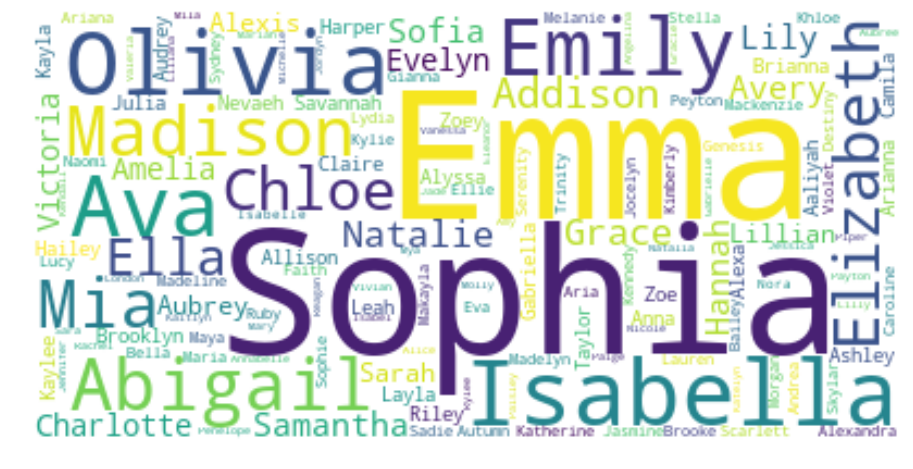

In [32]:
d = {}
for a, x in df_female_post2007.values:
    d[a] = x
wordcloud = WordCloud(background_color='white', min_font_size=int(4))
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(16, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");

The most popular names for baby girls over the past decade are Sophia and Emma.

### Sophia

In [33]:
fig_sophia = create_graph_time(df, 'Sophia', 'female', '', '', '', '', '0')
py.iplot(fig_sophia)

Looking at the trend of Sophia, it was not widely used back in the 90s but has become more and more popular since then. It peaked in 2012 but we are seeing a decreasing trend after that.

In [34]:
choromap_sophia = create_choromap(df, 'Sophia', 'female', 1995, 2016)
pyonline.iplot(choromap_sophia, filename='choromap_sophia')

From Sophia's choropleth map in 2012, people in Rhode Island really liked the name, followed by several other states including Vermont, New Hampshire, Wyoming and Hawaii.

### Emma

In [35]:
fig_emma = create_graph_time(df, 'Emma', 'female', '', '', '', '', 0)
py.iplot(fig_emma)

Emma has gained its popularity since the 90s and is still very popular nowadays.

In [36]:
choromap_emma = create_choromap(df, 'Emma', 'female', 1995, 2016)
pyonline.iplot(choromap_emma, filename='choromap_emma')

Emma was a popular name choice in North Dakota, Maine, Vermont and New Hampshire in 2003 but was not popular in California, New Mexico and Texas.

In [37]:
df_male = pd.DataFrame(df[df['gender'] == 'M'].
                       groupby(['year', 'name'])['count'].sum()).reset_index()
df_male_post2010 = pd.DataFrame(df_male[df_male['year'] > 2010].
                                groupby('name')['count'].sum()).reset_index()

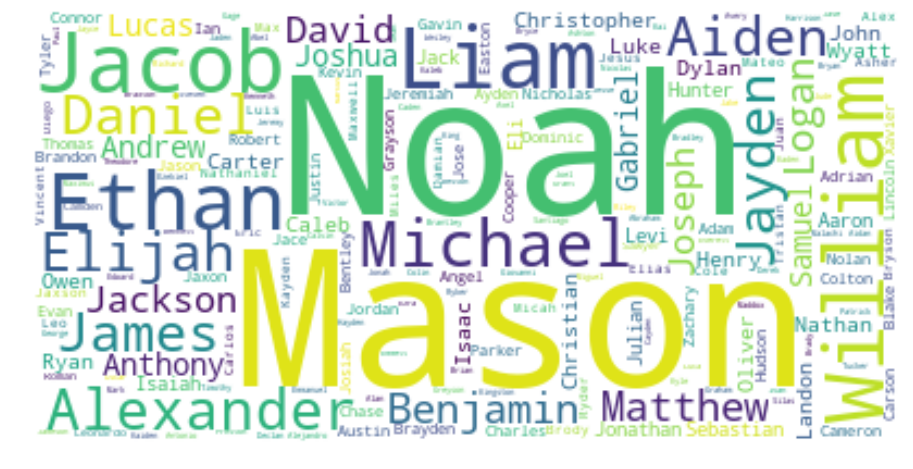

In [38]:
d = {}
for a, x in df_male_post2010.values:
    d[a] = x
wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(16, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");

The most popular names for baby boys over the past decade are Mason and Noah.

In [39]:
fig_mason = create_graph_time(df, 'Mason', 'male', '', '', '', '', 0)
py.iplot(fig_mason)

Similar to Sophia, people started to use Mason more and more since around the 90s. The number registered a maximum in 2011 but gradually declined after that.

In [40]:
choromap_mason = create_choromap(df, 'Mason', 'male', 1995, 2016)
pyonline.iplot(choromap_mason, filename='choromap_mason')

The choropleth map of Mason is actually pretty similar to that of Emma - both were frequently used in North Dakota, Maine, Vermont but not in California, New Mexico and Texas. Unlike Emma, Mason was also used a lot in Rhode Island and South Dakota.

In [41]:
fig_noah = create_graph_time(df, 'Noah', 'male', '', '', '', '', 0)
py.iplot(fig_noah)

Similar to other popular names in the recent decade, Noah also started gaining its popularity since the 90s. It quickly reached the zenith in 1999 and still remains popular nowadays.

In [42]:
choromap_noah = create_choromap(df, 'Noah', 'male', 1995, 2016)
pyonline.iplot(choromap_noah, filename='choromap_noah')

In 2015, Noah is favored in Rhode Island, Delaware, West Virginia and Hawaii.

<a id='appendix'></a>

## Appendix

In [43]:
df_yearly_full = pd.DataFrame(df_full.groupby('year')['count'].sum()).reset_index()
df_yearly_full = pd.merge(df_yearly_full, df_birth)
df_yearly_full['unpop_count'] = df_yearly_full['birth_number'] - df_yearly['count']
popular = go.Scatter(x=df_yearly_full['year'], y=round(df_yearly_full['count'], -3),
                     name='Babies Born with Popular Name', 
                     line=dict(color='rgb(153, 0, 153)', width=3), fill='none')
total = go.Scatter(x=df_yearly_full['year'], y=round(df_yearly_full['birth_number'], -3),
                   name='Total Babies Born', 
                   line=dict(color='rgb(0, 153, 153)', width=3), fill='tonexty')
data = [popular, total]
layout = dict(title='Total No. of Babies Born & No. of Babies with Popular Name', font=dict(size=16),
              xaxis=dict(title='Year', titlefont=dict(size=18),
                         tickfont=dict(size=14)),
              yaxis=dict(title='No. of Babies Born',
                         titlefont=dict(size=18), tickfont=dict(size=14)),
              legend=dict(font=dict(size=12)))
fig = dict(data=data, layout=layout)
py.iplot(fig)

When comparing the number of births and the number of babies applying for Social Security, the big gap between the two from 1910s to 1930s is probably because the Social Security Administration was established in August 14, 1935 and not that many people applied for Social Security before that. Thus, data from Social Security application before 1936 would underestimate the actual number of babies born with a particular name and therefore, I've decided to only focus on the data starting from 1936.

<a id='reference'></a>

## Reference

(1) https://catalog.data.gov/dataset/baby-names-from-social-security-card-applications-data-by-state-and-district-of- 

(2) https://catalog.data.gov/dataset/births-and-general-fertility-rates-united-states-1909-2013/resource/a4d978b0-3396-4bb9-b967-b3c8c69b03a3?inner_span=True

(3) https://www.biography.com/people/rihanna-201257

(4) https://en.wikipedia.org/wiki/List_of_awards_and_nominations_received_by_Rihanna

(5) https://worldhistoryproject.org/topics/beyonce-knowles/page/1

(6) https://www.cnn.com/2013/04/29/us/kobe-bryant-fast-facts/index.html

